In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as matplt

# Signal

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


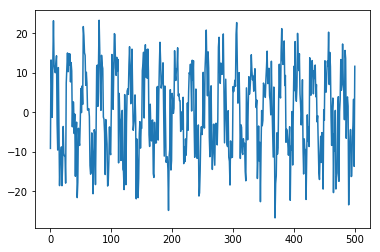

In [19]:
fs = 5000 #采样频率
ts = 1/fs #采样间隔
T = 0.1 #时长
N = fs*T + 1 #采样点
nfft = N
tn = np.linspace(0, T, N) #
fn = np.arange(len(tn))/(len(tn)-1)
fn = fs*fn

noise_power = 0.012 * fs / 2
time = np.arange(N) / fs

xn = 5*np.sin(2*np.pi*1200*tn) + 12*np.sin(2*np.pi*200*tn) + np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(xn)

# Power Spectrum Density

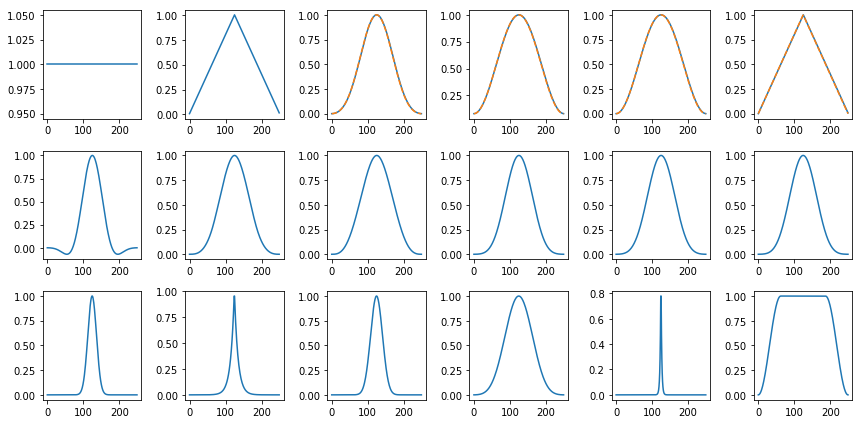

In [3]:
nperseg_num = np.array([round(N/2), round(N/12)])
noverlap_num = nperseg_num/2

win001 = signal.get_window('boxcar', nperseg_num[0])
win002 = signal.get_window('triang', nperseg_num[0])
win003 = signal.get_window('blackman', nperseg_num[0])
win004 = signal.get_window('hamming', nperseg_num[0])
win005 = signal.get_window('hann', nperseg_num[0])
win006 = signal.get_window('bartlett', nperseg_num[0])
win007 = signal.get_window('flattop', nperseg_num[0])
win008 = signal.get_window('parzen', nperseg_num[0])
win009 = signal.get_window('bohman', nperseg_num[0])
win010 = signal.get_window('blackmanharris', nperseg_num[0])
win011 = signal.get_window('nuttall', nperseg_num[0])
win012 = signal.kaiser(nperseg_num[0], beta=12)
win013 = signal.gaussian(nperseg_num[0], std=12)
win014 = signal.general_gaussian(nperseg_num[0], p=0.5, sig=5)
win015 = signal.slepian(nperseg_num[0], width=0.3)
win016 = signal.chebwin(nperseg_num[0], at=100)
win017 = signal.exponential(nperseg_num[0], tau=2)
win018 = signal.tukey(nperseg_num[0])
win019 = np.hamming(nperseg_num[0])
win020 = np.hanning(nperseg_num[0])
win021 = np.bartlett(nperseg_num[0])
win022 = np.blackman(nperseg_num[0])

win101 = signal.get_window('boxcar', nperseg_num[1])
win102 = signal.get_window('triang', nperseg_num[1])
win103 = signal.get_window('blackman', nperseg_num[1])
win104 = signal.get_window('hamming', nperseg_num[1])
win105 = signal.get_window('hann', nperseg_num[1])
win106 = signal.get_window('bartlett', nperseg_num[1])
win107 = signal.get_window('flattop', nperseg_num[1])
win108 = signal.get_window('parzen', nperseg_num[1])
win109 = signal.get_window('bohman', nperseg_num[1])
win110 = signal.get_window('blackmanharris', nperseg_num[1])
win111 = signal.get_window('nuttall', nperseg_num[1])
win112 = signal.kaiser(nperseg_num[1], beta=12)
win113 = signal.gaussian(nperseg_num[1], std=12)
win114 = signal.general_gaussian(nperseg_num[1], p=0.5, sig=5)
win115 = signal.slepian(nperseg_num[1], width=0.3)
win116 = signal.chebwin(nperseg_num[1], at=100)
win117 = signal.exponential(nperseg_num[1], tau=2)
win118 = signal.tukey(nperseg_num[1])
win119 = np.hamming(nperseg_num[1])
win120 = np.hanning(nperseg_num[1])
win121 = np.bartlett(nperseg_num[1])
win122 = np.blackman(nperseg_num[1])

plt.figure(figsize=[12,6])
plt.subplot(3,6,1)
plt.plot(win001)
plt.subplot(3,6,2)
plt.plot(win002)
plt.subplot(3,6,3)
plt.plot(win003)
plt.plot(win022, '--')
plt.subplot(3,6,4)
plt.plot(win004)
plt.plot(win019, '--')
plt.subplot(3,6,5)
plt.plot(win005)
plt.plot(win020, '--')
plt.subplot(3,6,6)
plt.plot(win006)
plt.plot(win021, '--')
plt.subplot(3,6,7)
plt.plot(win007)
plt.subplot(3,6,8)
plt.plot(win008)
plt.subplot(3,6,9)
plt.plot(win009)
plt.subplot(3,6,10)
plt.plot(win010)
plt.subplot(3,6,11)
plt.plot(win011)
plt.subplot(3,6,12)
plt.plot(win012)
plt.subplot(3,6,13)
plt.plot(win013)
plt.subplot(3,6,14)
plt.plot(win014)
plt.subplot(3,6,15)
plt.plot(win015)
plt.subplot(3,6,16)
plt.plot(win016)
plt.subplot(3,6,17)
plt.plot(win017)
plt.subplot(3,6,18)
plt.plot(win018)

plt.tight_layout()

In [5]:
tf_xn = np.fft.fft(xn,nfft)

# calculate by definition
Pxx0 = abs(tf_xn)**2/(nfft*fs)

# calculate by periodogram
f_p, Pxx_p = signal.periodogram(xn, fs, nfft=N, scaling='density', return_onesided=1)

# calculate by welch
f_w00, Pxx_w00 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=round(N/2), noverlap=0, window=win001)
f_w01, Pxx_w01 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win002)
f_w02, Pxx_w02 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win002)
f_w03, Pxx_w03 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win102)
f_w04, Pxx_w04 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win005)
f_w05, Pxx_w05 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win005)
f_w06, Pxx_w06 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win105)
f_w07, Pxx_w07 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win007)
f_w08, Pxx_w08 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win007)
f_w09, Pxx_w09 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win107)
f_w10, Pxx_w10 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win013)
f_w11, Pxx_w11 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win013)
f_w12, Pxx_w12 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win113)
f_w13, Pxx_w13 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win017)
f_w14, Pxx_w14 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win017)
f_w15, Pxx_w15 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win117)
f_w16, Pxx_w16 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[0], window=win018)
f_w17, Pxx_w17 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[0], noverlap=noverlap_num[1], window=win018)
f_w18, Pxx_w18 = signal.welch(xn, fs, nfft=N, return_onesided=1, nperseg=nperseg_num[1], noverlap=noverlap_num[1], window=win118)

# calculate by mlab.psd(welch)
Pxx_m00, freqs00 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=0, window=win001)
Pxx_m01, freqs01 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win002)
Pxx_m02, freqs02 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win002)
Pxx_m03, freqs03 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win102)
Pxx_m04, freqs04 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win005)
Pxx_m05, freqs05 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win005)
Pxx_m06, freqs06 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win105)
Pxx_m07, freqs07 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win007)
Pxx_m08, freqs08 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win007)
Pxx_m09, freqs09 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win107)
Pxx_m10, freqs10 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win013)
Pxx_m11, freqs11 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win013)
Pxx_m12, freqs12 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win113)
Pxx_m13, freqs13 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win017)
Pxx_m14, freqs14 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win017)
Pxx_m15, freqs15 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win117)
Pxx_m16, freqs16 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[0], window=win018)
Pxx_m17, freqs17 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[0], noverlap=noverlap_num[1], window=win018)
Pxx_m18, freqs18 = mlab.psd(xn, Fs=fs, sides='onesided', NFFT=nperseg_num[1], noverlap=noverlap_num[1], window=win118)


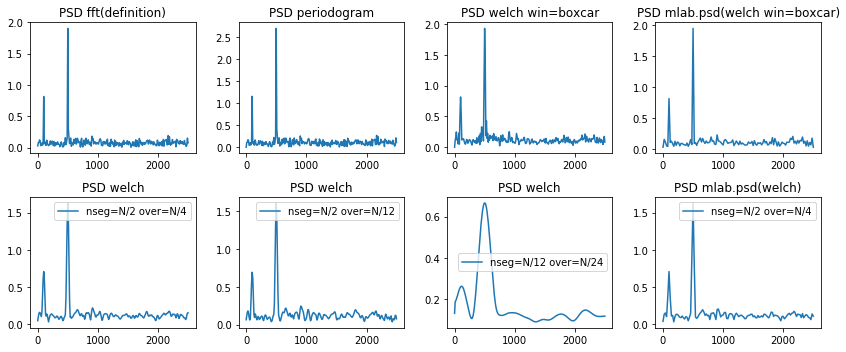

In [16]:
# plot
plt.figure(figsize=[12,5])
plt.subplot(2,4,1)
plt.plot(fn[0:round((len(xn)+1)/2)],np.sqrt(Pxx0[0:round((len(xn)+1)/2)]))
plt.title('PSD fft(definition)')
plt.subplot(2,4,2)
plt.plot(f_p, np.sqrt(Pxx_p))
plt.title('PSD periodogram')
plt.subplot(2,4,3)
plt.plot(f_w00, np.sqrt(Pxx_w00))
plt.title('PSD welch win=boxcar')
plt.subplot(2,4,4)
plt.plot(freqs00, np.sqrt(Pxx_m00))
plt.title('PSD mlab.psd(welch win=boxcar)')
plt.subplot(2,4,5)
plt.plot(f_w04, np.sqrt(Pxx_w04))
plt.title('PSD welch')
plt.legend(['nseg=N/2 over=N/4'])
plt.subplot(2,4,6)
plt.plot(f_w05, np.sqrt(Pxx_w05))
plt.title('PSD welch')
plt.legend(['nseg=N/2 over=N/12'])
plt.subplot(2,4,7)
plt.plot(f_w06, np.sqrt(Pxx_w06))
plt.title('PSD welch')
plt.legend(['nseg=N/12 over=N/24'])
plt.subplot(2,4,8)
plt.plot(freqs04, np.sqrt(Pxx_m04))
plt.title('PSD mlab.psd(welch)')
plt.legend(['nseg=N/2 over=N/4'])

plt.tight_layout()

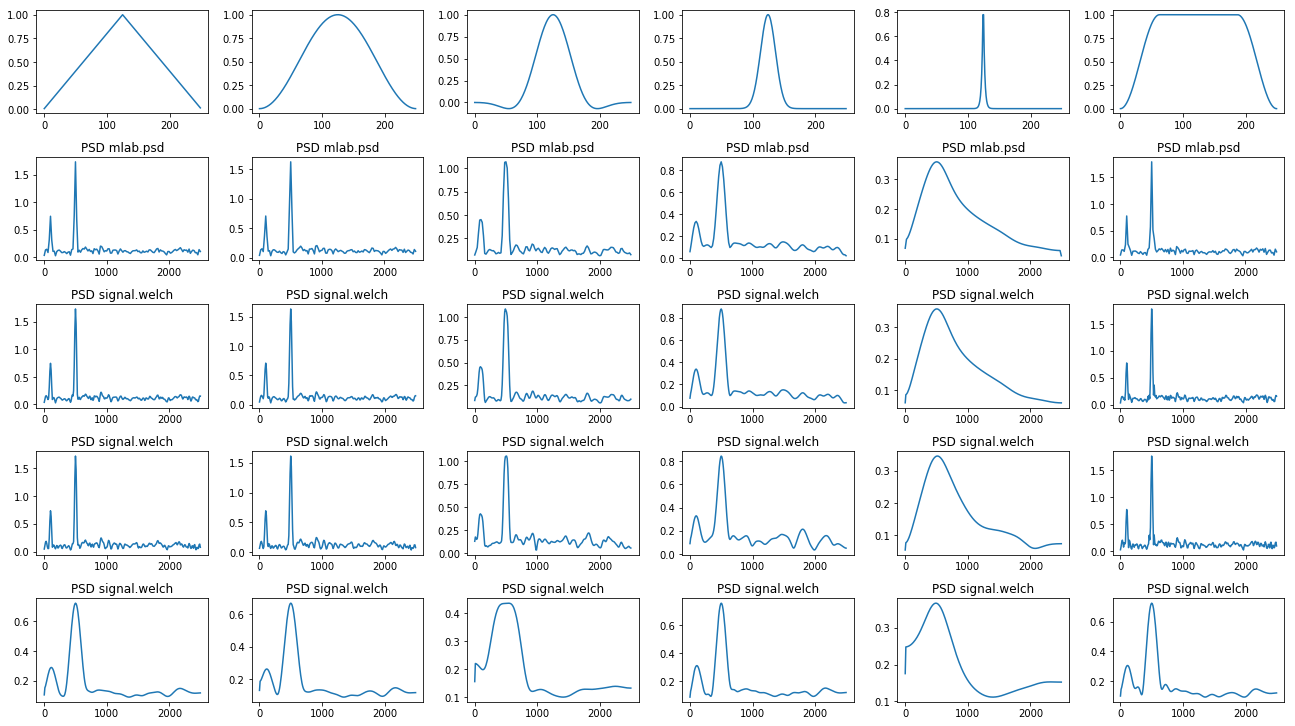

In [6]:
# plot
plt.figure(figsize=[18,12])

plt.subplot(6,6,1)
plt.plot(win002)
plt.subplot(6,6,2)
plt.plot(win005)
plt.subplot(6,6,3)
plt.plot(win007)
plt.subplot(6,6,4)
plt.plot(win013)
plt.subplot(6,6,5)
plt.plot(win017)
plt.subplot(6,6,6)
plt.plot(win018)

plt.subplot(6,6,7)
plt.plot(freqs01, np.sqrt(Pxx_m01))
plt.title('PSD mlab.psd')
plt.subplot(6,6,8)
plt.plot(freqs01, np.sqrt(Pxx_m04))
plt.title('PSD mlab.psd')
plt.subplot(6,6,9)
plt.plot(freqs01, np.sqrt(Pxx_m07))
plt.title('PSD mlab.psd')
plt.subplot(6,6,10)
plt.plot(freqs01, np.sqrt(Pxx_m10))
plt.title('PSD mlab.psd')
plt.subplot(6,6,11)
plt.plot(freqs01, np.sqrt(Pxx_m13))
plt.title('PSD mlab.psd')
plt.subplot(6,6,12)
plt.plot(freqs01, np.sqrt(Pxx_m16))
plt.title('PSD mlab.psd')

plt.subplot(6,6,13)
plt.plot(f_w00, np.sqrt(Pxx_w01))
plt.title('PSD signal.welch')
plt.subplot(6,6,19)
plt.plot(f_w02, np.sqrt(Pxx_w02))
plt.title('PSD signal.welch')
plt.subplot(6,6,25)
plt.plot(f_w03, np.sqrt(Pxx_w03))
plt.title('PSD signal.welch')
plt.subplot(6,6,14)
plt.plot(f_w04, np.sqrt(Pxx_w04))
plt.title('PSD signal.welch')
plt.subplot(6,6,20)
plt.plot(f_w05, np.sqrt(Pxx_w05))
plt.title('PSD signal.welch')
plt.subplot(6,6,26)
plt.plot(f_w06, np.sqrt(Pxx_w06))
plt.title('PSD signal.welch')
plt.subplot(6,6,15)
plt.plot(f_w00, np.sqrt(Pxx_w07))
plt.title('PSD signal.welch')
plt.subplot(6,6,21)
plt.plot(f_w02, np.sqrt(Pxx_w08))
plt.title('PSD signal.welch')
plt.subplot(6,6,27)
plt.plot(f_w03, np.sqrt(Pxx_w09))
plt.title('PSD signal.welch')
plt.subplot(6,6,16)
plt.plot(f_w04, np.sqrt(Pxx_w10))
plt.title('PSD signal.welch')
plt.subplot(6,6,22)
plt.plot(f_w05, np.sqrt(Pxx_w11))
plt.title('PSD signal.welch')
plt.subplot(6,6,28)
plt.plot(f_w06, np.sqrt(Pxx_w12))
plt.title('PSD signal.welch')
plt.subplot(6,6,17)
plt.plot(f_w00, np.sqrt(Pxx_w13))
plt.title('PSD signal.welch')
plt.subplot(6,6,23)
plt.plot(f_w02, np.sqrt(Pxx_w14))
plt.title('PSD signal.welch')
plt.subplot(6,6,29)
plt.plot(f_w03, np.sqrt(Pxx_w15))
plt.title('PSD signal.welch')
plt.subplot(6,6,18)
plt.plot(f_w04, np.sqrt(Pxx_w16))
plt.title('PSD signal.welch')
plt.subplot(6,6,24)
plt.plot(f_w05, np.sqrt(Pxx_w17))
plt.title('PSD signal.welch')
plt.subplot(6,6,30)
plt.plot(f_w06, np.sqrt(Pxx_w18))
plt.title('PSD signal.welch')

plt.tight_layout()

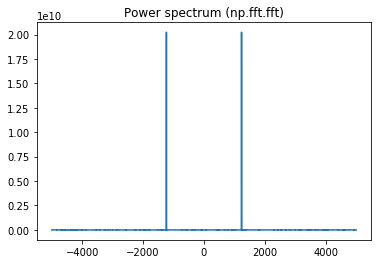

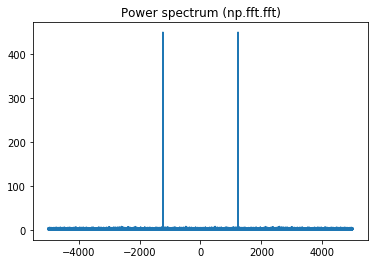

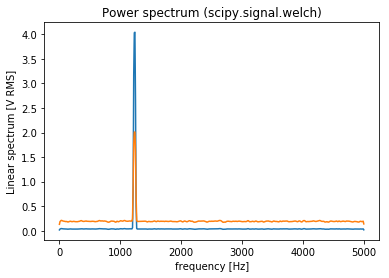

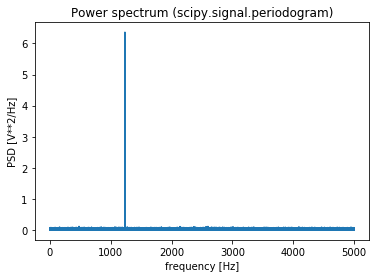

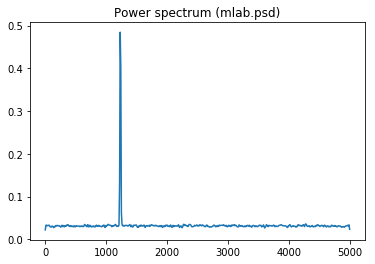

In [9]:
fs = 10e3
N = 1e5 #sample
NFFT = 1024
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# np.fft.fft
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2/N
plt.figure()
plt.plot(freqs[idx], np.sqrt(ps[idx]))
plt.title('Power spectrum (np.fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.plot(f, Pxx_spec)
plt.plot(f, np.sqrt(Pxx_spec))
# plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

f, Pxx_den = signal.periodogram(x, fs)
plt.figure()
# plt.plot(f, Pxx_den)
plt.plot(f, np.sqrt(Pxx_den))
# plt.yscale('log')
# plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Power spectrum (scipy.signal.periodogram)')
plt.show()

Pxx, freqs = mlab.psd(x, Fs = fs, NFFT = NFFT)
plt.figure()
plt.plot(freqs, np.sqrt(Pxx),label='')
plt.title('Power spectrum (mlab.psd)')
plt.show()